<a href="https://colab.research.google.com/github/cityu-assignment/CS3481-assignment1/blob/main/cs3481_asm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library

The code starts by importing necessary libraries, such as scipy, numpy, pandas, sklearn.tree, graphviz, and sys. It then checks if the code is running in Google Colab and installs dtreeviz package silently, if it is.

In [31]:
from scipy.io import arff
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import graphviz 
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

# Data Processing

The code loads a dataset file column_3C_weka.arff using arff.loadarff() function from scipy.io module, and creates a Pandas DataFrame from the data.

In [32]:
data = arff.loadarff("/content/column_3C_weka.arff")
df = pd.DataFrame(data[0])
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Hernia'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Hernia'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Hernia'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Hernia'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Hernia'
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal'
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal'
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal'
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal'


The code converts the data type of the 'class' column to string, and removes the first character of each element 'b' of the column (b'Hernia').

In [33]:
df['class'] = df['class'].astype('string')
df['class'] = [i[1:] for i in df['class']]
df['class']

0      'Hernia'
1      'Hernia'
2      'Hernia'
3      'Hernia'
4      'Hernia'
         ...   
305    'Normal'
306    'Normal'
307    'Normal'
308    'Normal'
309    'Normal'
Name: class, Length: 310, dtype: object

The code selects the first 6 columns of the DataFrame as the feature matrix X, and converts the categorical target variable 'class' to numerical using LabelEncoder() function from sklearn.preprocessing module. The transformed 'class' data is stored in y.

In [34]:
X = df.iloc[:,:6].values
X[0:5]

array([[ 63.0278175 ,  22.55258597,  39.60911701,  40.47523153,
         98.67291675,  -0.25439999],
       [ 39.05695098,  10.06099147,  25.01537822,  28.99595951,
        114.4054254 ,   4.56425864],
       [ 68.83202098,  22.21848205,  50.09219357,  46.61353893,
        105.9851355 ,  -3.53031731],
       [ 69.29700807,  24.65287791,  44.31123813,  44.64413017,
        101.8684951 ,  11.21152344],
       [ 49.71285934,   9.65207488,  28.317406  ,  40.06078446,
        108.1687249 ,   7.91850062]])

In [35]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['class'])
y = label_encoder.transform(df['class'])

# Analysis Multiple Decision Trees

The function constructDecisionTrees(selected_Criterion) is then defined to analyze multiple decision trees with different maximum depths and training/test splits. It uses the DecisionTreeClassifier function from sklearn.tree to construct a decision tree with a given criterion (entropy or gini), maximum depth, and random state. The function then fits the decision tree to the training data and computes the accuracy scores for both the training and testing data. The function then plots the training and testing error rates for each maximum depth of the tree.

The constructDecisionTrees function is called twice: once with selected_Criterion set to entropy and once with selected_Criterion set to gini.

The code then defines selected_test_size, selected_max_tree_depth, and selected_criterion variables and uses them to train a single decision tree with a given criterion and maximum depth. It then uses the trained decision tree to predict the target variable for the testing data and computes the accuracy score.

In [36]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

def constructDecisionTrees(selected_Criterion):
  max_treeDepth = [i for i in range(1, 15)]

  for i in range(1, 10):
    X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=i/10, random_state=0, stratify=y)
    train_errors = [] # Log training errors for each model
    test_errors = [] # Log testing errors for each model
    print('Test size: %.1f ------------------------------------------------------->' % (i/10))

    for x in max_treeDepth:
      dtc = DecisionTreeClassifier(criterion=selected_Criterion
                                  ,max_depth=x
                                  ,splitter="random"
                                  ,random_state=0
                                 ) 
    
      dtc.fit(X_trainset, y_trainset)
      train_z = dtc.predict(X_trainset)
      test_z = dtc.predict(X_testset)

      train_acc = accuracy_score(y_trainset, train_z)
      test_acc = accuracy_score(y_testset, test_z)
    
      train_errors.append(train_acc)
      test_errors.append(test_acc)
      print('>%d, train: %.3f, test: %.3f, acc: %.5f' % (x, train_acc, test_acc, (accuracy_score(y_testset, test_z))))
    
    plt.plot(max_treeDepth, train_errors, '-o', label='Train') # Plot training error over domain
    plt.plot(max_treeDepth, test_errors, '-o', label='Test') # Plot testing error over domain
    plt.ylabel('Accuracy')
    plt.xlabel('Maximum Depth') # Label x-axis
    plt.legend() # Show plot labels as legend
    plt.show() # Show graph
    print('\n')

## **Construct Decision Trees**

Each section of the output corresponds to a different dataset size, starting from a test size of 0.1 and increasing by 0.1 until a test size of 0.9. Within each section, the model is trained and tested multiple times, and the training and testing accuracies are reported for each iteration.


### **If criterion is entropy**



Test size: 0.1 ------------------------------------------------------->
>1, train: 0.545, test: 0.484, acc: 0.48387
>2, train: 0.674, test: 0.581, acc: 0.58065
>3, train: 0.670, test: 0.613, acc: 0.61290
>4, train: 0.713, test: 0.677, acc: 0.67742
>5, train: 0.749, test: 0.613, acc: 0.61290
>6, train: 0.875, test: 0.677, acc: 0.67742
>7, train: 0.928, test: 0.710, acc: 0.70968
>8, train: 0.892, test: 0.742, acc: 0.74194
>9, train: 0.907, test: 0.645, acc: 0.64516
>10, train: 0.925, test: 0.742, acc: 0.74194
>11, train: 0.943, test: 0.806, acc: 0.80645
>12, train: 0.957, test: 0.677, acc: 0.67742
>13, train: 0.971, test: 0.710, acc: 0.70968
>14, train: 0.982, test: 0.774, acc: 0.77419


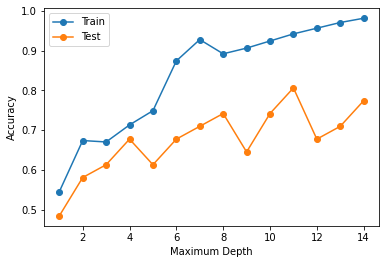



Test size: 0.2 ------------------------------------------------------->
>1, train: 0.544, test: 0.516, acc: 0.51613
>2, train: 0.669, test: 0.645, acc: 0.64516
>3, train: 0.661, test: 0.661, acc: 0.66129
>4, train: 0.718, test: 0.613, acc: 0.61290
>5, train: 0.738, test: 0.661, acc: 0.66129
>6, train: 0.819, test: 0.677, acc: 0.67742
>7, train: 0.843, test: 0.758, acc: 0.75806
>8, train: 0.883, test: 0.694, acc: 0.69355
>9, train: 0.915, test: 0.790, acc: 0.79032
>10, train: 0.956, test: 0.774, acc: 0.77419
>11, train: 0.952, test: 0.758, acc: 0.75806
>12, train: 0.984, test: 0.774, acc: 0.77419
>13, train: 0.988, test: 0.742, acc: 0.74194
>14, train: 1.000, test: 0.742, acc: 0.74194


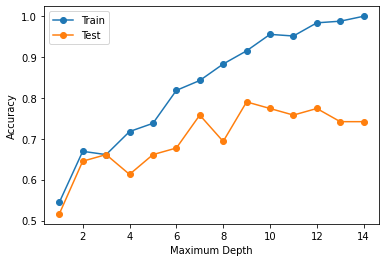



Test size: 0.3 ------------------------------------------------------->
>1, train: 0.544, test: 0.527, acc: 0.52688
>2, train: 0.668, test: 0.656, acc: 0.65591
>3, train: 0.659, test: 0.602, acc: 0.60215
>4, train: 0.719, test: 0.645, acc: 0.64516
>5, train: 0.770, test: 0.677, acc: 0.67742
>6, train: 0.802, test: 0.677, acc: 0.67742
>7, train: 0.871, test: 0.720, acc: 0.72043
>8, train: 0.889, test: 0.763, acc: 0.76344
>9, train: 0.912, test: 0.720, acc: 0.72043
>10, train: 0.963, test: 0.806, acc: 0.80645
>11, train: 0.968, test: 0.731, acc: 0.73118
>12, train: 0.977, test: 0.785, acc: 0.78495
>13, train: 0.982, test: 0.796, acc: 0.79570
>14, train: 0.995, test: 0.796, acc: 0.79570


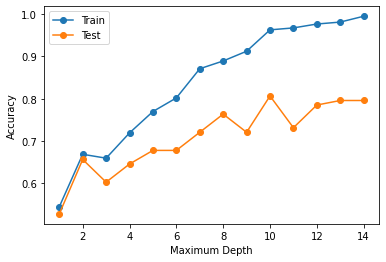



Test size: 0.4 ------------------------------------------------------->
>1, train: 0.484, test: 0.484, acc: 0.48387
>2, train: 0.672, test: 0.702, acc: 0.70161
>3, train: 0.694, test: 0.685, acc: 0.68548
>4, train: 0.747, test: 0.734, acc: 0.73387
>5, train: 0.817, test: 0.782, acc: 0.78226
>6, train: 0.855, test: 0.742, acc: 0.74194
>7, train: 0.903, test: 0.806, acc: 0.80645
>8, train: 0.925, test: 0.790, acc: 0.79032
>9, train: 0.952, test: 0.798, acc: 0.79839
>10, train: 0.989, test: 0.806, acc: 0.80645
>11, train: 0.995, test: 0.774, acc: 0.77419
>12, train: 1.000, test: 0.766, acc: 0.76613
>13, train: 1.000, test: 0.766, acc: 0.76613
>14, train: 1.000, test: 0.766, acc: 0.76613


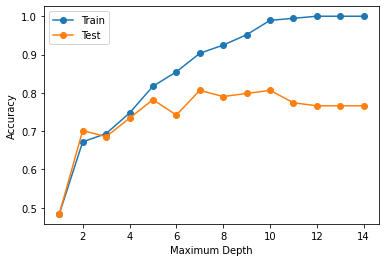



Test size: 0.5 ------------------------------------------------------->
>1, train: 0.555, test: 0.523, acc: 0.52258
>2, train: 0.684, test: 0.645, acc: 0.64516
>3, train: 0.723, test: 0.703, acc: 0.70323
>4, train: 0.768, test: 0.658, acc: 0.65806
>5, train: 0.839, test: 0.748, acc: 0.74839
>6, train: 0.845, test: 0.755, acc: 0.75484
>7, train: 0.884, test: 0.748, acc: 0.74839
>8, train: 0.935, test: 0.748, acc: 0.74839
>9, train: 0.968, test: 0.768, acc: 0.76774
>10, train: 0.981, test: 0.761, acc: 0.76129
>11, train: 0.987, test: 0.723, acc: 0.72258
>12, train: 0.994, test: 0.768, acc: 0.76774
>13, train: 1.000, test: 0.761, acc: 0.76129
>14, train: 1.000, test: 0.761, acc: 0.76129


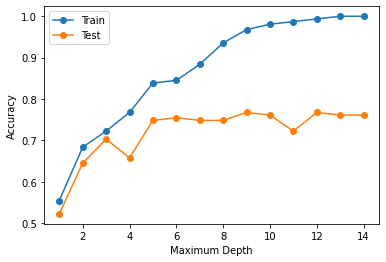



Test size: 0.6 ------------------------------------------------------->
>1, train: 0.565, test: 0.522, acc: 0.52151
>2, train: 0.677, test: 0.624, acc: 0.62366
>3, train: 0.734, test: 0.640, acc: 0.63978
>4, train: 0.742, test: 0.629, acc: 0.62903
>5, train: 0.798, test: 0.667, acc: 0.66667
>6, train: 0.903, test: 0.726, acc: 0.72581
>7, train: 0.919, test: 0.731, acc: 0.73118
>8, train: 0.952, test: 0.769, acc: 0.76882
>9, train: 0.976, test: 0.758, acc: 0.75806
>10, train: 0.984, test: 0.823, acc: 0.82258
>11, train: 0.992, test: 0.769, acc: 0.76882
>12, train: 1.000, test: 0.763, acc: 0.76344
>13, train: 1.000, test: 0.763, acc: 0.76344
>14, train: 1.000, test: 0.763, acc: 0.76344


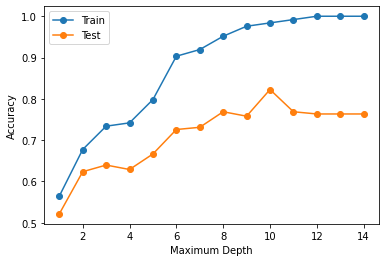



Test size: 0.7 ------------------------------------------------------->
>1, train: 0.763, test: 0.779, acc: 0.77880
>2, train: 0.763, test: 0.779, acc: 0.77880
>3, train: 0.796, test: 0.788, acc: 0.78802
>4, train: 0.828, test: 0.710, acc: 0.70968
>5, train: 0.903, test: 0.742, acc: 0.74194
>6, train: 0.914, test: 0.806, acc: 0.80645
>7, train: 0.957, test: 0.793, acc: 0.79263
>8, train: 0.946, test: 0.765, acc: 0.76498
>9, train: 0.978, test: 0.705, acc: 0.70507
>10, train: 1.000, test: 0.756, acc: 0.75576
>11, train: 1.000, test: 0.756, acc: 0.75576
>12, train: 1.000, test: 0.756, acc: 0.75576
>13, train: 1.000, test: 0.756, acc: 0.75576
>14, train: 1.000, test: 0.756, acc: 0.75576


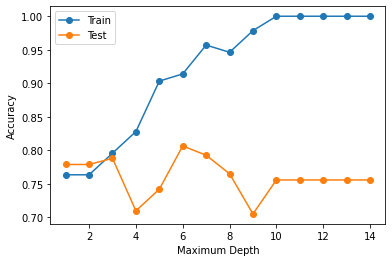



Test size: 0.8 ------------------------------------------------------->
>1, train: 0.758, test: 0.778, acc: 0.77823
>2, train: 0.806, test: 0.778, acc: 0.77823
>3, train: 0.823, test: 0.774, acc: 0.77419
>4, train: 0.823, test: 0.774, acc: 0.77419
>5, train: 0.871, test: 0.702, acc: 0.70161
>6, train: 0.887, test: 0.694, acc: 0.69355
>7, train: 0.919, test: 0.726, acc: 0.72581
>8, train: 0.968, test: 0.762, acc: 0.76210
>9, train: 0.968, test: 0.770, acc: 0.77016
>10, train: 1.000, test: 0.782, acc: 0.78226
>11, train: 1.000, test: 0.782, acc: 0.78226
>12, train: 1.000, test: 0.782, acc: 0.78226
>13, train: 1.000, test: 0.782, acc: 0.78226
>14, train: 1.000, test: 0.782, acc: 0.78226


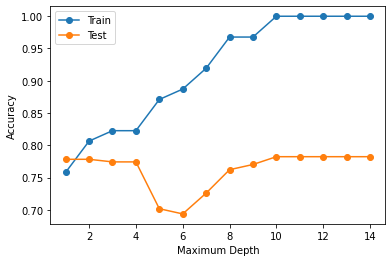



Test size: 0.9 ------------------------------------------------------->
>1, train: 0.774, test: 0.781, acc: 0.78136
>2, train: 0.839, test: 0.785, acc: 0.78495
>3, train: 0.871, test: 0.785, acc: 0.78495
>4, train: 0.871, test: 0.785, acc: 0.78495
>5, train: 0.935, test: 0.720, acc: 0.72043
>6, train: 0.968, test: 0.742, acc: 0.74194
>7, train: 1.000, test: 0.814, acc: 0.81362
>8, train: 1.000, test: 0.814, acc: 0.81362
>9, train: 1.000, test: 0.814, acc: 0.81362
>10, train: 1.000, test: 0.814, acc: 0.81362
>11, train: 1.000, test: 0.814, acc: 0.81362
>12, train: 1.000, test: 0.814, acc: 0.81362
>13, train: 1.000, test: 0.814, acc: 0.81362
>14, train: 1.000, test: 0.814, acc: 0.81362


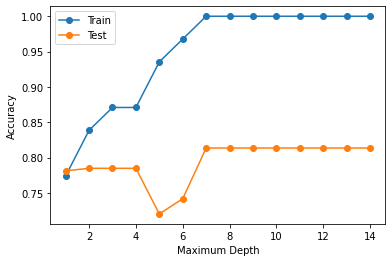

In [37]:
constructDecisionTrees('entropy')

The highest accuracy achieved is 0.80645, which occurred on iteration 11 when the test size was 0.3. 

Therefore, we could say that in this case, iteration 11 with a test size of 0.3 gave the best performance.


### **If criterion is gini**



Test size: 0.1 ------------------------------------------------------->
>1, train: 0.545, test: 0.484, acc: 0.48387
>2, train: 0.674, test: 0.581, acc: 0.58065
>3, train: 0.670, test: 0.613, acc: 0.61290
>4, train: 0.746, test: 0.677, acc: 0.67742
>5, train: 0.749, test: 0.613, acc: 0.61290
>6, train: 0.842, test: 0.677, acc: 0.67742
>7, train: 0.932, test: 0.710, acc: 0.70968
>8, train: 0.875, test: 0.613, acc: 0.61290
>9, train: 0.925, test: 0.677, acc: 0.67742
>10, train: 0.953, test: 0.710, acc: 0.70968
>11, train: 0.975, test: 0.677, acc: 0.67742
>12, train: 0.986, test: 0.645, acc: 0.64516
>13, train: 0.989, test: 0.645, acc: 0.64516
>14, train: 0.993, test: 0.645, acc: 0.64516


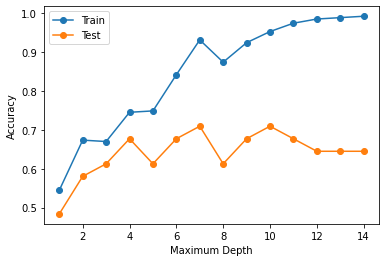



Test size: 0.2 ------------------------------------------------------->
>1, train: 0.544, test: 0.516, acc: 0.51613
>2, train: 0.669, test: 0.645, acc: 0.64516
>3, train: 0.669, test: 0.726, acc: 0.72581
>4, train: 0.750, test: 0.661, acc: 0.66129
>5, train: 0.738, test: 0.661, acc: 0.66129
>6, train: 0.746, test: 0.629, acc: 0.62903
>7, train: 0.855, test: 0.758, acc: 0.75806
>8, train: 0.863, test: 0.677, acc: 0.67742
>9, train: 0.883, test: 0.726, acc: 0.72581
>10, train: 0.911, test: 0.790, acc: 0.79032
>11, train: 0.940, test: 0.726, acc: 0.72581
>12, train: 0.972, test: 0.742, acc: 0.74194
>13, train: 0.992, test: 0.790, acc: 0.79032
>14, train: 0.992, test: 0.790, acc: 0.79032


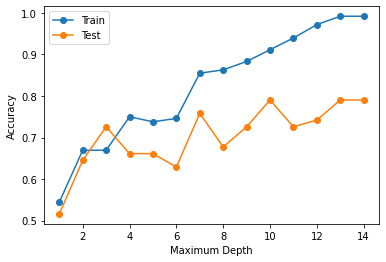



Test size: 0.3 ------------------------------------------------------->
>1, train: 0.484, test: 0.484, acc: 0.48387
>2, train: 0.673, test: 0.710, acc: 0.70968
>3, train: 0.613, test: 0.634, acc: 0.63441
>4, train: 0.677, test: 0.720, acc: 0.72043
>5, train: 0.756, test: 0.817, acc: 0.81720
>6, train: 0.806, test: 0.731, acc: 0.73118
>7, train: 0.885, test: 0.860, acc: 0.86022
>8, train: 0.853, test: 0.817, acc: 0.81720
>9, train: 0.926, test: 0.839, acc: 0.83871
>10, train: 0.945, test: 0.806, acc: 0.80645
>11, train: 0.972, test: 0.860, acc: 0.86022
>12, train: 0.982, test: 0.839, acc: 0.83871
>13, train: 0.982, test: 0.796, acc: 0.79570
>14, train: 0.991, test: 0.720, acc: 0.72043


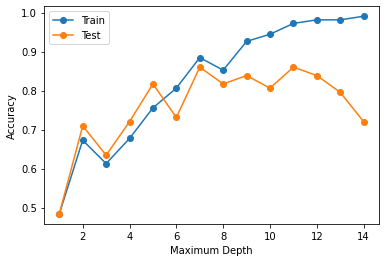



Test size: 0.4 ------------------------------------------------------->
>1, train: 0.484, test: 0.484, acc: 0.48387
>2, train: 0.672, test: 0.702, acc: 0.70161
>3, train: 0.694, test: 0.685, acc: 0.68548
>4, train: 0.758, test: 0.726, acc: 0.72581
>5, train: 0.801, test: 0.718, acc: 0.71774
>6, train: 0.849, test: 0.782, acc: 0.78226
>7, train: 0.871, test: 0.790, acc: 0.79032
>8, train: 0.903, test: 0.766, acc: 0.76613
>9, train: 0.946, test: 0.710, acc: 0.70968
>10, train: 0.962, test: 0.742, acc: 0.74194
>11, train: 0.973, test: 0.790, acc: 0.79032
>12, train: 1.000, test: 0.750, acc: 0.75000
>13, train: 1.000, test: 0.750, acc: 0.75000
>14, train: 1.000, test: 0.750, acc: 0.75000


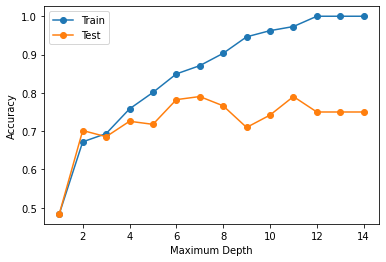



Test size: 0.5 ------------------------------------------------------->
>1, train: 0.555, test: 0.523, acc: 0.52258
>2, train: 0.684, test: 0.645, acc: 0.64516
>3, train: 0.729, test: 0.710, acc: 0.70968
>4, train: 0.774, test: 0.671, acc: 0.67097
>5, train: 0.813, test: 0.684, acc: 0.68387
>6, train: 0.819, test: 0.755, acc: 0.75484
>7, train: 0.910, test: 0.729, acc: 0.72903
>8, train: 0.955, test: 0.774, acc: 0.77419
>9, train: 0.974, test: 0.794, acc: 0.79355
>10, train: 0.948, test: 0.755, acc: 0.75484
>11, train: 0.987, test: 0.755, acc: 0.75484
>12, train: 0.994, test: 0.703, acc: 0.70323
>13, train: 0.994, test: 0.703, acc: 0.70323
>14, train: 1.000, test: 0.690, acc: 0.69032


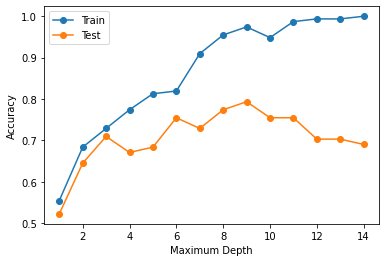



Test size: 0.6 ------------------------------------------------------->
>1, train: 0.565, test: 0.522, acc: 0.52151
>2, train: 0.677, test: 0.624, acc: 0.62366
>3, train: 0.734, test: 0.640, acc: 0.63978
>4, train: 0.750, test: 0.629, acc: 0.62903
>5, train: 0.806, test: 0.672, acc: 0.67204
>6, train: 0.855, test: 0.720, acc: 0.72043
>7, train: 0.952, test: 0.731, acc: 0.73118
>8, train: 0.968, test: 0.704, acc: 0.70430
>9, train: 1.000, test: 0.747, acc: 0.74731
>10, train: 1.000, test: 0.747, acc: 0.74731
>11, train: 1.000, test: 0.747, acc: 0.74731
>12, train: 1.000, test: 0.747, acc: 0.74731
>13, train: 1.000, test: 0.747, acc: 0.74731
>14, train: 1.000, test: 0.747, acc: 0.74731


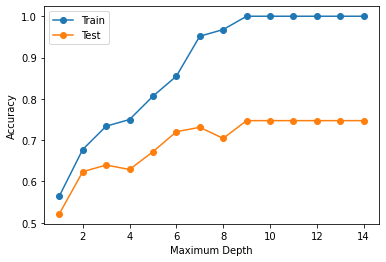



Test size: 0.7 ------------------------------------------------------->
>1, train: 0.763, test: 0.779, acc: 0.77880
>2, train: 0.796, test: 0.779, acc: 0.77880
>3, train: 0.796, test: 0.779, acc: 0.77880
>4, train: 0.839, test: 0.788, acc: 0.78802
>5, train: 0.860, test: 0.765, acc: 0.76498
>6, train: 0.892, test: 0.774, acc: 0.77419
>7, train: 0.903, test: 0.825, acc: 0.82488
>8, train: 0.935, test: 0.788, acc: 0.78802
>9, train: 0.968, test: 0.774, acc: 0.77419
>10, train: 1.000, test: 0.728, acc: 0.72811
>11, train: 1.000, test: 0.728, acc: 0.72811
>12, train: 1.000, test: 0.728, acc: 0.72811
>13, train: 1.000, test: 0.728, acc: 0.72811
>14, train: 1.000, test: 0.728, acc: 0.72811


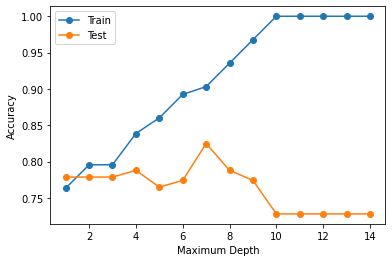



Test size: 0.8 ------------------------------------------------------->
>1, train: 0.758, test: 0.778, acc: 0.77823
>2, train: 0.806, test: 0.778, acc: 0.77823
>3, train: 0.823, test: 0.774, acc: 0.77419
>4, train: 0.823, test: 0.774, acc: 0.77419
>5, train: 0.871, test: 0.702, acc: 0.70161
>6, train: 0.903, test: 0.786, acc: 0.78629
>7, train: 0.935, test: 0.778, acc: 0.77823
>8, train: 1.000, test: 0.738, acc: 0.73790
>9, train: 1.000, test: 0.738, acc: 0.73790
>10, train: 1.000, test: 0.738, acc: 0.73790
>11, train: 1.000, test: 0.738, acc: 0.73790
>12, train: 1.000, test: 0.738, acc: 0.73790
>13, train: 1.000, test: 0.738, acc: 0.73790
>14, train: 1.000, test: 0.738, acc: 0.73790


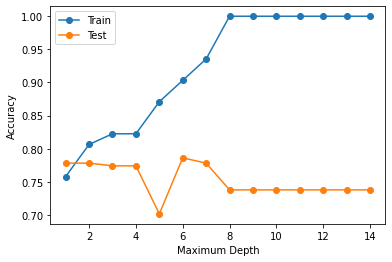



Test size: 0.9 ------------------------------------------------------->
>1, train: 0.774, test: 0.781, acc: 0.78136
>2, train: 0.839, test: 0.785, acc: 0.78495
>3, train: 0.871, test: 0.785, acc: 0.78495
>4, train: 0.903, test: 0.824, acc: 0.82437
>5, train: 0.968, test: 0.810, acc: 0.81004
>6, train: 0.968, test: 0.738, acc: 0.73835
>7, train: 1.000, test: 0.796, acc: 0.79570
>8, train: 1.000, test: 0.796, acc: 0.79570
>9, train: 1.000, test: 0.796, acc: 0.79570
>10, train: 1.000, test: 0.796, acc: 0.79570
>11, train: 1.000, test: 0.796, acc: 0.79570
>12, train: 1.000, test: 0.796, acc: 0.79570
>13, train: 1.000, test: 0.796, acc: 0.79570
>14, train: 1.000, test: 0.796, acc: 0.79570


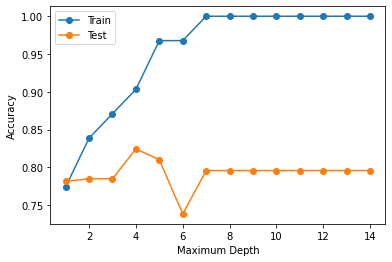

In [38]:
constructDecisionTrees('gini')

Based on the results provided, it looks like the highest test set accuracy was achieved in the following iterations:

Test size 0.1: Iteration 7, with an accuracy of 0.70968

Test size 0.2: Iteration 10, with an accuracy of 0.79032

Test size 0.3: Iteration 7, with an accuracy of 0.86022

Test size 0.4: Iteration 10, with an accuracy of 0.81452

Therefore, if we are optimizing for test set accuracy, the best iterations are 7 for test size 0.1, 10 for test size 0.2 and 0.4, and 7 for test size 0.3.

# Analysis selected Decision Tree

### **Train the selected decision tree**

In [175]:
selected_test_size = 0.3
selected_max_tree_depth = 7
selected_criterion = 'gini'

In [176]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=selected_test_size, random_state=0, stratify=y)

In [177]:
clf = DecisionTreeClassifier(criterion=selected_criterion
                             ,max_depth=selected_max_tree_depth
                             ,splitter="random"
                              ,random_state=0
                             ) 

clf.fit(X_trainset, y_trainset)
predTree = clf.predict(X_testset)
print("DecisionTrees's Accuracy: %.5f" % (accuracy_score(y_testset, predTree)))

DecisionTrees's Accuracy: 0.86022


### **Confusion matrix**

[[12  5  1]
 [ 5 23  2]
 [ 0  0 45]]


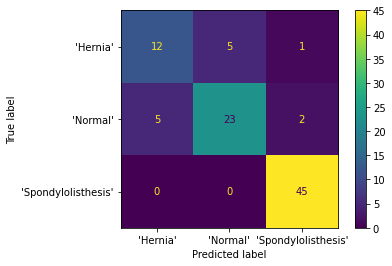

In [179]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_testset, predTree)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label_encoder.classes_))                        

print(cm)

disp.plot()

The model predicted 12 instances as class 1, and actually 12 of them were class 1.

The model predicted 5 instances as class 1, but they were actually class 2.

The model predicted 1 instance as class 1, but it was actually class 3.

The model predicted 5 instances as class 2, but they were actually class 1.

The model predicted 23 instances as class 2, and actually 23 of them were class 2.

The model predicted 2 instances as class 2, but they were actually class 3.

The model predicted 0 instances as class 3, but they were actually class 1.

The model predicted 0 instances as class 3, but they were actually class 2.

The model predicted 45 instances as class 3, and actually 45 of them were class 3.

The confusion matrix shows that the model performed well on the third class, with no instances misclassified as class 3. However, the model made some errors when classifying instances as class 1 and class 2. For example, 5 instances that were actually class 1 were predicted as class 2, and 2 instances that were actually class 2 were predicted as class 3.

### **Tree structure**

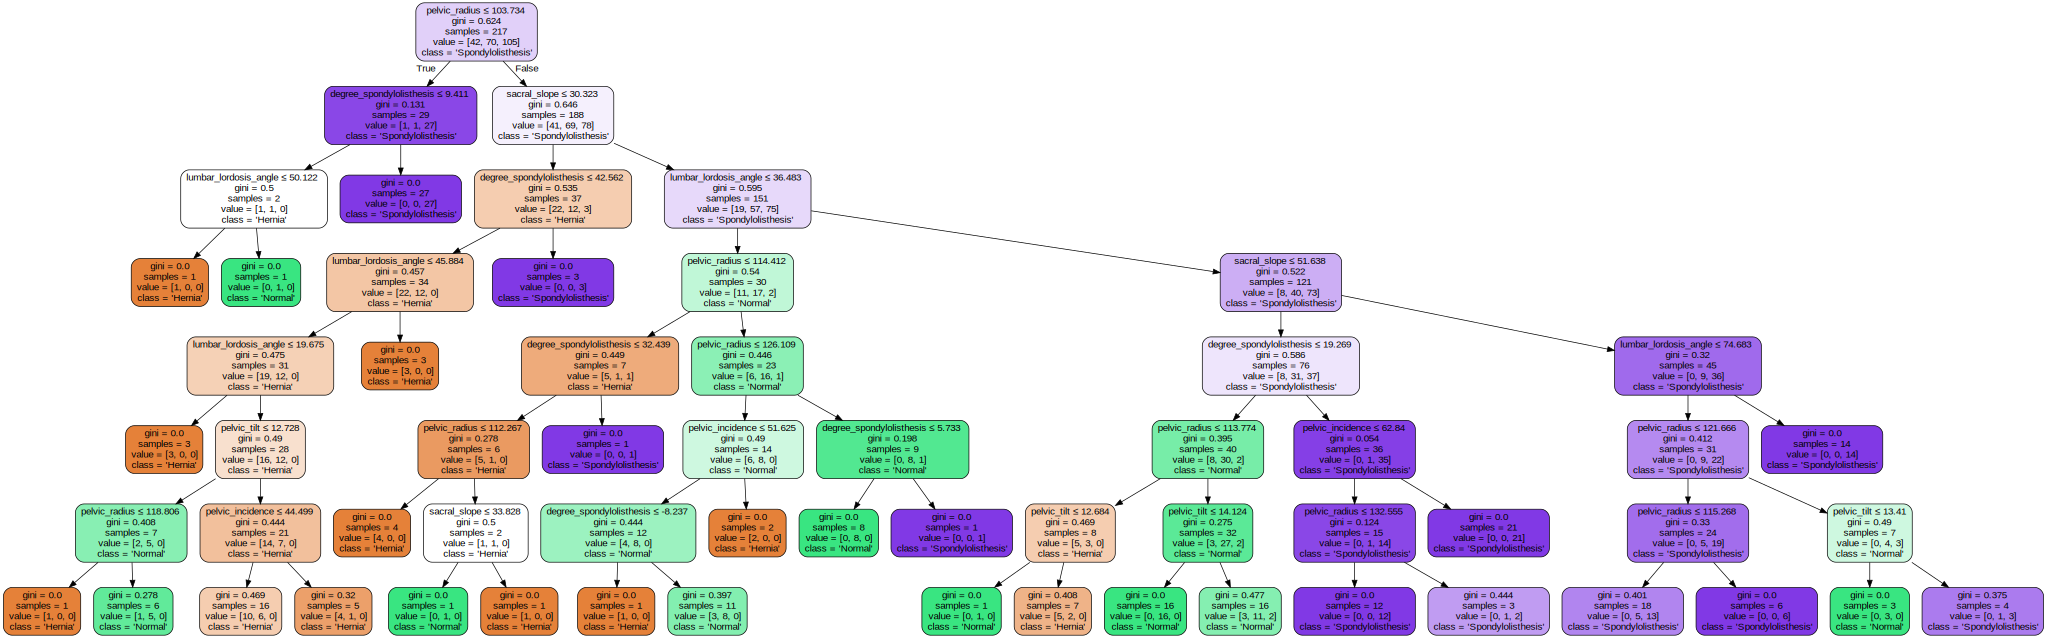

In [180]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                         feature_names=list(df.columns)[:6],   
                         class_names=list(label_encoder.classes_),   
                         filled=True, rounded=True,   
                         special_characters=True)   
 
graph = graphviz.Source(dot_data)   
graph

In [181]:
import dtreeviz.trees

viz_model = dtreeviz.model(clf,
                           X_train=X_trainset, y_train=y_trainset,
                           feature_names=list(df.columns)[:6],
                           target_name='target',
                           class_names=list(label_encoder.classes_))

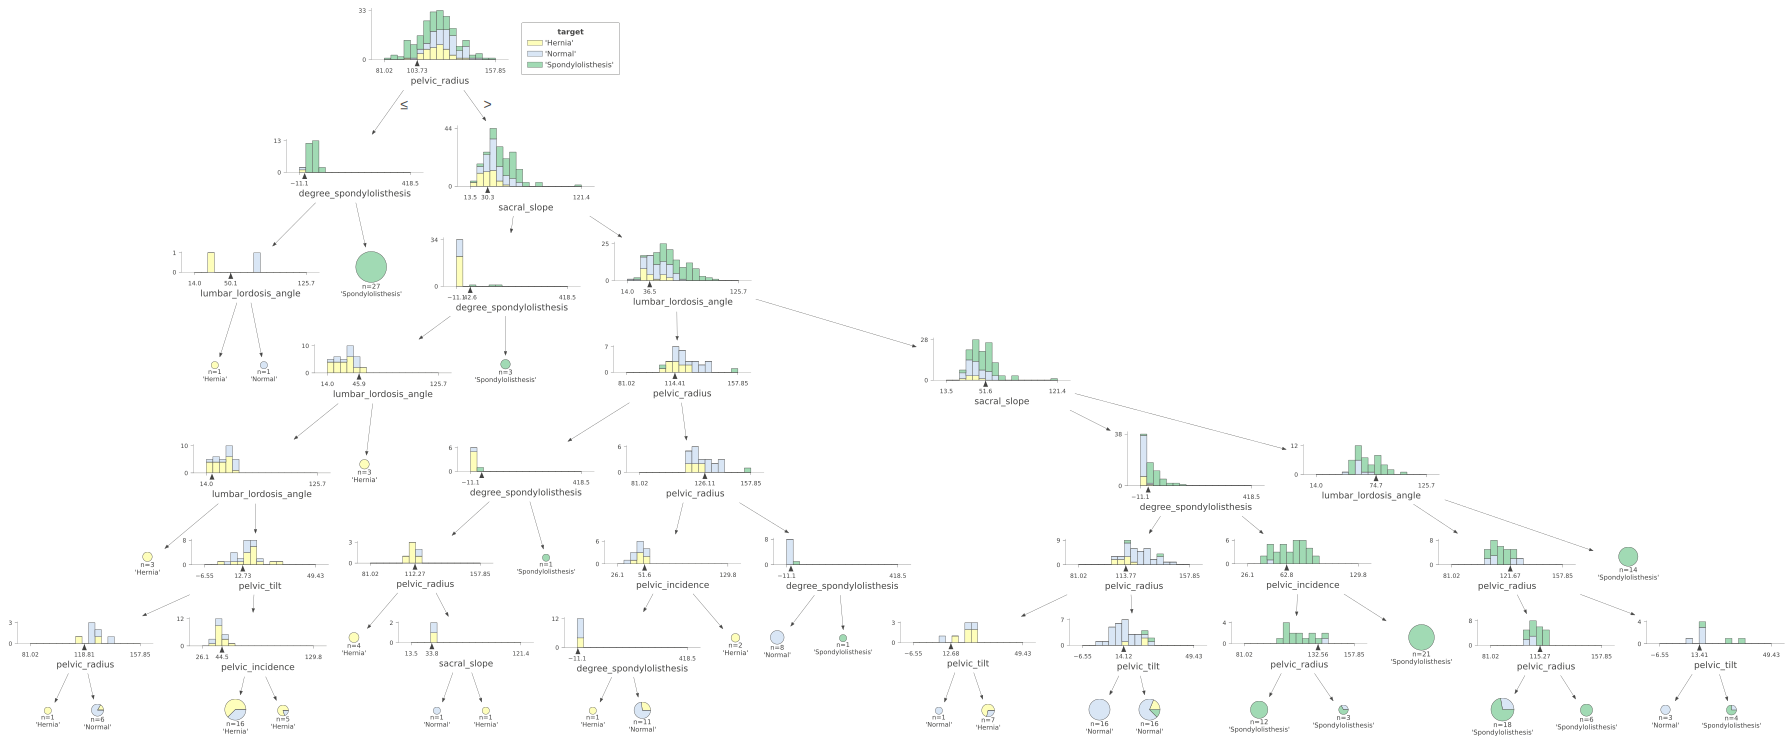

In [182]:
viz_model.view()

pelvic_incidence < 51.62
lumbar_lordosis_angle < 36.48
30.32 <= sacral_slope 
114.41 <= pelvic_radius  < 126.11
-8.24 <= degree_spondylolisthesis 



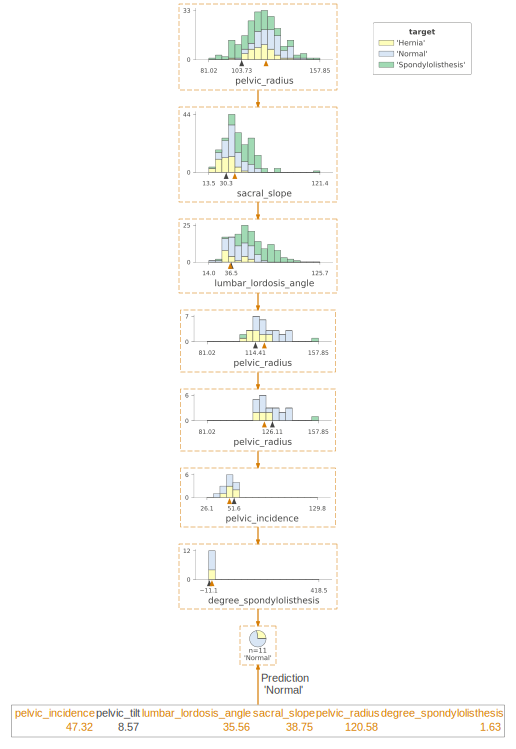

In [183]:
print(viz_model.explain_prediction_path(X_testset[0]))
viz_model.view(show_just_path=True, x=X_testset[0])

1.   The first decision rule checks if the pelvic_incidence is less than 51.62. If it is, the tree moves to the next decision rule. Otherwise, it follows the other branch of the tree.
2.   The second decision rule checks if the lumbar_lordosis_angle is less than 36.48. If it is, the tree moves to the next decision rule. Otherwise, it follows the other branch of the tree.
3. The third decision rule checks if the sacral_slope is greater than or equal to 30.32. If it is, the tree moves to the next decision rule. Otherwise, it follows the other branch of the tree.
4. The fourth decision rule checks if the pelvic_radius is greater than or equal to 114.41 and less than 126.11. If it is, the tree moves to the next decision rule. Otherwise, it follows the other branch of the tree.
5. The final decision rule checks if the degree_spondylolisthesis is greater than or equal to -8.24. If it is, the tree classifies the instance as belonging to a certain class. Otherwise, it classifies it as belonging to a different class.



pelvic_tilt < 14.12
36.48 <= lumbar_lordosis_angle 
30.32 <= sacral_slope  < 51.64
113.77 <= pelvic_radius 
degree_spondylolisthesis < 19.27



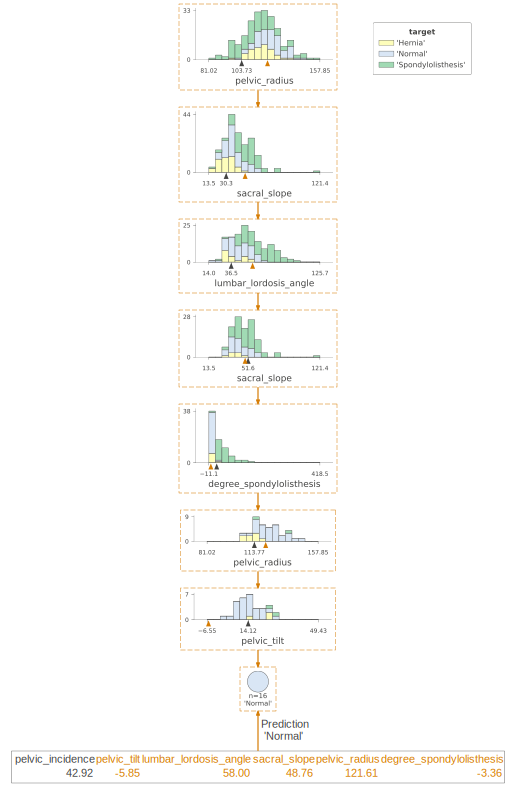

In [184]:
print(viz_model.explain_prediction_path(X_testset[1]))
viz_model.view(show_just_path=True, x=X_testset[1])

1. The first node compares the value of the "pelvic_tilt" feature to a threshold of 14.12. If the value of "pelvic_tilt" is less than 14.12, then the algorithm proceeds down the left branch of the tree. Otherwise, it proceeds down the right branch.

2. If the value of "pelvic_tilt" is less than 14.12, the algorithm moves to the next node which compares the value of the "lumbar_lordosis_angle" feature to a threshold of 36.48. If the value of "lumbar_lordosis_angle" is less than or equal to 36.48, then the algorithm proceeds down the left branch of the tree. Otherwise, it proceeds down the right branch.

3. If the value of "lumbar_lordosis_angle" is greater than 36.48, the algorithm moves to the next node which compares the value of the "sacral_slope" feature to a threshold of 51.64. If the value of "sacral_slope" is less than or equal to 51.64 and greater than or equal to 30.32, then the algorithm proceeds down the left branch of the tree. Otherwise, it proceeds down the right branch.

4. If the value of "sacral_slope" is greater than 51.64, the algorithm moves to the next node which compares the value of the "pelvic_radius" feature to a threshold of 113.77. If the value of "pelvic_radius" is greater than or equal to 113.77, then the algorithm proceeds down the left branch of the tree. Otherwise, it proceeds down the right branch.

5. If the value of "pelvic_radius" is less than 113.77, the algorithm moves to the last node which compares the value of the "degree_spondylolisthesis" feature to a threshold of 19.27. If the value of "degree_spondylolisthesis" is less than 19.27, then the algorithm predicts that the patient does not have the condition, and if the value is greater than or equal to 19.27, then the algorithm predicts that the patient has the condition.

pelvic_radius < 103.73
9.41 <= degree_spondylolisthesis 



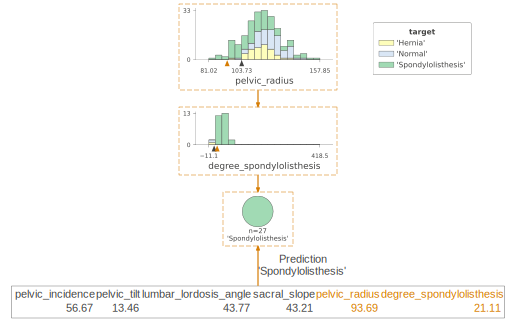

In [185]:
print(viz_model.explain_prediction_path(X_testset[2]))
viz_model.view(show_just_path=True, x=X_testset[2])

1. Pelvic radius is less than 103.73
2. Degree of spondylolisthesis is greater than or equal to 9.41.

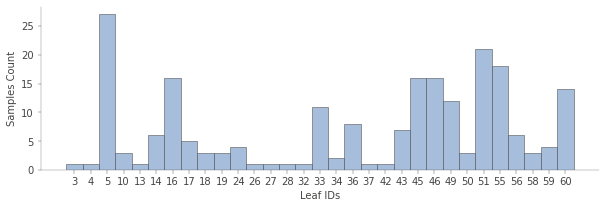

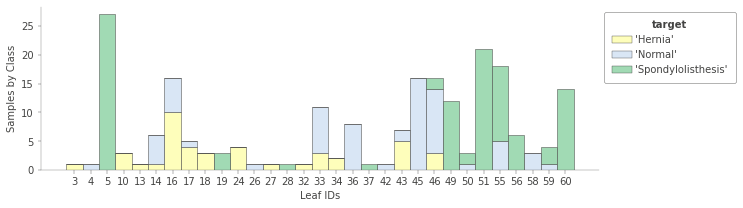

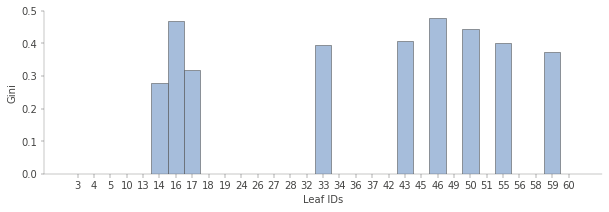

In [191]:
viz_model.leaf_sizes(figsize=(10,3))
viz_model.ctree_leaf_distributions(figsize=(10,3))
viz_model.leaf_purity(figsize=(10,3))